In [1]:
import sys
import os, glob
import csv 
import calendar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
import netCDF4 as nc

In [18]:
# Variables and Units use standard AmeriFlux convention
# set daily averaging times
am = '7:00'
pm = '16:00'

### WREF

In [19]:
# NEON-WREF (from Rich)
in_file='./data/WREF_2018-2021.csv'
df = pd.read_csv(in_file,index_col=0,parse_dates=True,header=0)
WREF = df.between_time(am,pm).resample('D').mean()

<ipython-input-33-f46abc4ddc31>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  st = pd.datetime(2021,3,1) ; en = pd.datetime(2021,10,1)


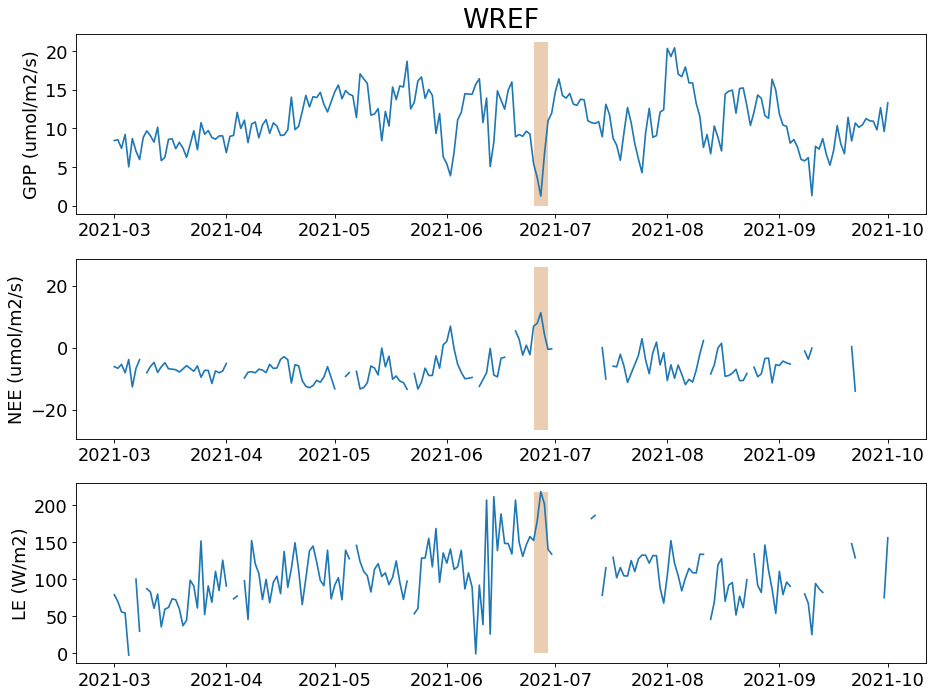

In [33]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

st = pd.datetime(2021,3,1) ; en = pd.datetime(2021,10,1)
heatdome = pd.date_range(datetime(2021,6,25),datetime(2021,6,29),freq='D')

plt.subplot(3,1,1)
plt.plot(WREF['GPP'][st:en])
plt.fill_between(heatdome, np.tile(0,len(heatdome)),np.tile(np.max(WREF['GPP']),len(heatdome)),facecolor='peru',alpha=0.4)
plt.ylabel('GPP (umol/m2/s)')
plt.title('WREF',fontsize=24)

plt.subplot(3,1,2)
plt.plot(WREF['NEE'][st:en])
plt.fill_between(heatdome, np.tile(np.min(WREF['NEE']),len(heatdome)),np.tile(np.max(WREF['NEE']),len(heatdome)),facecolor='peru',alpha=0.4)
plt.ylabel('NEE (umol/m2/s)')

plt.subplot(3,1,3)
plt.plot(WREF['LE'][st:en])
plt.fill_between(heatdome, np.tile(0,len(heatdome)),np.tile(np.max(WREF['LE']),len(heatdome)),facecolor='peru',alpha=0.4)
plt.ylabel('LE (W/m2)')

plt.tight_layout()
plt.savefig('./figs/Fluxes_2021_daily7-16_WREF.png',dpi=300)

### CA-Ca3

In [22]:
in_file = './data/CA-Ca3_2001-2021.csv'
df = pd.read_csv(in_file,header=0,index_col=0, parse_dates=True, squeeze=True)
CACa3 = df.between_time(am,pm).resample('D').mean()

<ipython-input-34-e260fa4250b1>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  st = pd.datetime(2021,3,1) ; en = pd.datetime(2021,10,1)


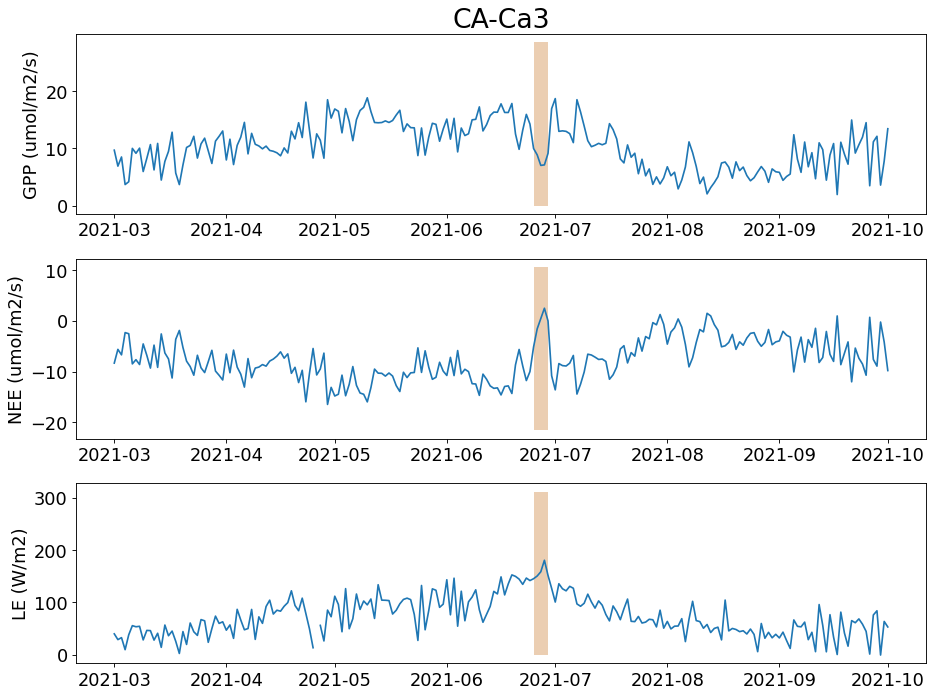

In [34]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

st = pd.datetime(2021,3,1) ; en = pd.datetime(2021,10,1)
heatdome = pd.date_range(datetime(2021,6,25),datetime(2021,6,29),freq='D')

plt.subplot(3,1,1)
plt.plot(CACa3['GPP'][st:en])
plt.fill_between(heatdome, np.tile(0,len(heatdome)),np.tile(np.max(CACa3['GPP']),len(heatdome)),facecolor='peru',alpha=0.4)
plt.ylabel('GPP (umol/m2/s)')
plt.title('CA-Ca3',fontsize=24)

plt.subplot(3,1,2)
plt.plot(CACa3['NEE'][st:en])
plt.fill_between(heatdome, np.tile(np.min(CACa3['NEE']),len(heatdome)),np.tile(np.max(CACa3['NEE']),len(heatdome)),facecolor='peru',alpha=0.4)
plt.ylabel('NEE (umol/m2/s)')

plt.subplot(3,1,3)
plt.plot(CACa3['LE'][st:en])
plt.fill_between(heatdome, np.tile(0,len(heatdome)),np.tile(np.max(CACa3['LE']),len(heatdome)),facecolor='peru',alpha=0.4)
plt.ylabel('LE (W/m2)')

plt.tight_layout()
plt.savefig('./figs/Fluxes_2021_daily7-16_CACa3.png',dpi=300)

### US-Me6

In [26]:
in_file='./data/US-Me6_2021.csv'
df = pd.read_csv(in_file,index_col=0,parse_dates=True,header=0)
USMe6 = df.between_time(am,pm).resample('D').mean()

<ipython-input-35-67ad53901941>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  st = pd.datetime(2021,3,1) ; en = pd.datetime(2021,10,1)


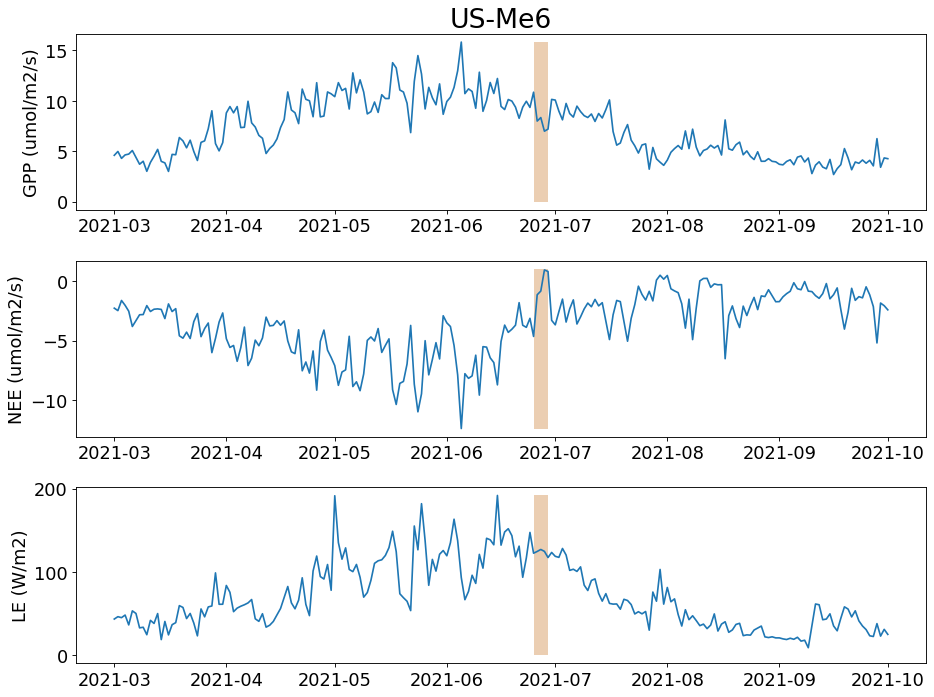

In [35]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})

st = pd.datetime(2021,3,1) ; en = pd.datetime(2021,10,1)
heatdome = pd.date_range(datetime(2021,6,25),datetime(2021,6,29),freq='D')

plt.subplot(3,1,1)
plt.plot(-USMe6['GPP'][st:en])
plt.fill_between(heatdome, np.tile(0,len(heatdome)),np.tile(np.max(-USMe6['GPP']),len(heatdome)),facecolor='peru',alpha=0.4)
plt.ylabel('GPP (umol/m2/s)')
plt.title('US-Me6',fontsize=24)

plt.subplot(3,1,2)
plt.plot(USMe6['NEE'][st:en])
plt.fill_between(heatdome, np.tile(np.min(USMe6['NEE']),len(heatdome)),np.tile(np.max(USMe6['NEE']),len(heatdome)),facecolor='peru',alpha=0.4)
plt.ylabel('NEE (umol/m2/s)')

plt.subplot(3,1,3)
plt.plot(USMe6['LE'][st:en])
plt.fill_between(heatdome, np.tile(0,len(heatdome)),np.tile(np.max(USMe6['LE']),len(heatdome)),facecolor='peru',alpha=0.4)
plt.ylabel('LE (W/m2)')

plt.tight_layout()
plt.savefig('./figs/Fluxes_2021_daily7-16_USMe6.png',dpi=300)